In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 8.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=6473f160200aa9bcc309765d876964a45e4e96b69e1762b9423dc10fe155da88
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


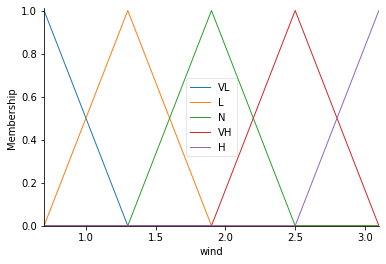

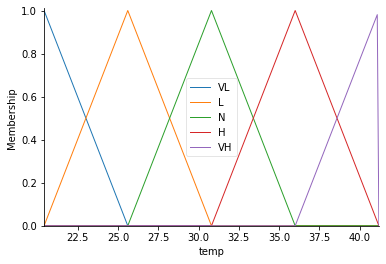

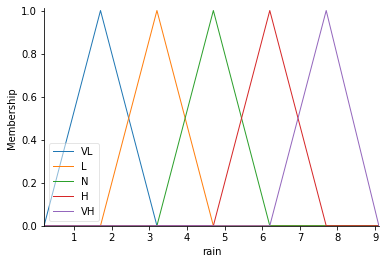

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
'''Antecedent: đầu vào
Consequent: ouput(kết quả)'''
wind= ctrl.Antecedent(np.arange(0.7,3.2,0.1),'wind')
temp = ctrl.Antecedent(np.arange(20.4,41.3,0.1),'temp')
rain = ctrl.Consequent(np.arange(0.2,9.2,0.1),'rain')
wind['VL']=fuzz.trimf(wind.universe,[0.7,0.7,1.3])
wind['L']=fuzz.trimf(wind.universe,[0.7,1.3,1.9])
wind['N']=fuzz.trimf(wind.universe,[1.3,1.9,2.5])
wind['VH']=fuzz.trimf(wind.universe,[1.9,2.5,3.1])
wind['H']=fuzz.trimf(wind.universe,[2.5,3.1,3.1])

temp['VL']=fuzz.trimf(temp.universe,[20.4,20.4,25.6])
temp['L']=fuzz.trimf(temp.universe,[20.4,25.6,30.8])
temp['N']=fuzz.trimf(temp.universe,[25.6,30.8,36])
temp['H']=fuzz.trimf(temp.universe,[30.8,36,41.2])
temp['VH']=fuzz.trimf(temp.universe,[36,41.2,41.2])

rain['VL']=fuzz.trimf(rain.universe,[0.2,1.7,3.2])
rain['L']=fuzz.trimf(rain.universe,[1.7,3.2,4.7])
rain['N']=fuzz.trimf(rain.universe,[3.2,4.7,6.2])
rain['H']=fuzz.trimf(rain.universe,[4.7,6.2,7.7])
rain['VH']=fuzz.trimf(rain.universe,[6.2,7.7,9.1])

wind.view()
temp.view()
rain.view()



4.893364350117216


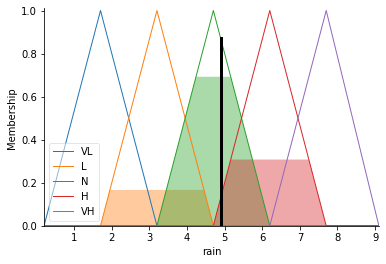

In [ ]:
rule1 = ctrl.Rule(wind['VL']&temp['VL'],rain['VL'])
rule2 = ctrl.Rule(wind['VL']&temp['L'],rain['VL'])
rule3 = ctrl.Rule(wind['VL']&temp['N'],rain['L'])
rule4 = ctrl.Rule(wind['VL']&temp['H'],rain['L'])
rule5 = ctrl.Rule(wind['VL']&temp['VH'],rain['N'])

rule6 = ctrl.Rule(wind['L']&temp['VL'],rain['VL'])
rule7 = ctrl.Rule(wind['L']&temp['L'],rain['VL'])
rule8 = ctrl.Rule(wind['L']&temp['N'],rain['L'])
rule9 = ctrl.Rule(wind['L']&temp['H'],rain['N'])
rule10 = ctrl.Rule(wind['L']&temp['VH'],rain['H'])

rule11 = ctrl.Rule(wind['N']&temp['VL'],rain['L'])
rule12 = ctrl.Rule(wind['N']&temp['L'],rain['L'])
rule13 = ctrl.Rule(wind['N']&temp['N'],rain['N'])
rule14 = ctrl.Rule(wind['N']&temp['H'],rain['H'])
rule15 = ctrl.Rule(wind['N']&temp['VH'],rain['H'])

rule16 = ctrl.Rule(wind['H']&temp['VL'],rain['L'])
rule17 = ctrl.Rule(wind['H']&temp['L'],rain['N'])
rule18 = ctrl.Rule(wind['H']&temp['N'],rain['L'])
rule19 = ctrl.Rule(wind['H']&temp['H'],rain['VH'])
rule20 = ctrl.Rule(wind['H']&temp['VH'],rain['VH'])


rule21 = ctrl.Rule(wind['VH']&temp['VL'],rain['N'])
rule22 = ctrl.Rule(wind['VH']&temp['L'],rain['H'])
rule23 = ctrl.Rule(wind['VH']&temp['N'],rain['H'])
rule24 = ctrl.Rule(wind['VH']&temp['H'],rain['VH'])
rule25 = ctrl.Rule(wind['VH']&temp['VH'],rain['VH'])

raining_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6, rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16, rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
raining = ctrl.ControlSystemSimulation(raining_ctrl)
raining.input['wind'] = 2.4
raining.input['temp'] = 22
raining.compute()
print(raining.output['rain'])
rain.view(sim=raining)

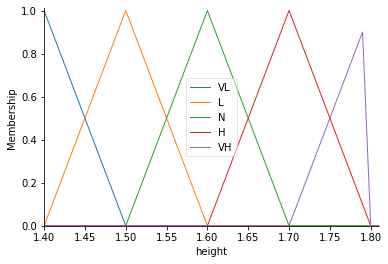

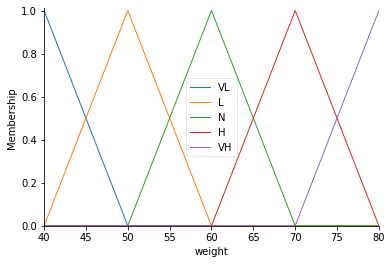

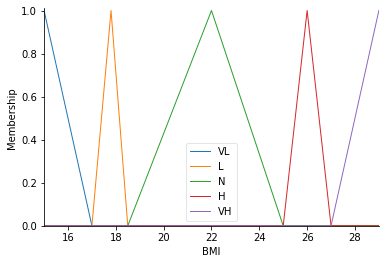

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
'''Antecedent: đầu vào
Consequent: ouput(kết quả)'''
height= ctrl.Antecedent(np.arange(1.4,1.81,0.01),'height')
weight = ctrl.Antecedent(np.arange(40,81,5),'weight')
BMI = ctrl.Consequent(np.arange(15,29.1,0.1),'BMI')
height['VL']=fuzz.trimf(height.universe,[1.4,1.4,1.5])
height['L']=fuzz.trimf(height.universe,[1.4,1.5,1.6])
height['N']=fuzz.trimf(height.universe,[1.5,1.6,1.7])
height['H']=fuzz.trimf(height.universe,[1.6,1.7,1.8])
height['VH']=fuzz.trimf(height.universe,[1.7,1.8,1.8])

weight['VL']=fuzz.trimf(weight.universe,[40,40,50])
weight['L']=fuzz.trimf(weight.universe,[40,50,60])
weight['N']=fuzz.trimf(weight.universe,[50,60,70])
weight['H']=fuzz.trimf(weight.universe,[60,70,80])
weight['VH']=fuzz.trimf(weight.universe,[70,80,80])

BMI['VL']=fuzz.trimf(BMI.universe,[15,15,17])
BMI['L']=fuzz.trimf(BMI.universe,[17,17.8,18.5])
BMI['N']=fuzz.trimf(BMI.universe,[18.5,22,25])
BMI['H']=fuzz.trimf(BMI.universe,[25,26,27])
BMI['VH']=fuzz.trimf(BMI.universe,[27,29,29])

height.view()
weight.view()
BMI.view()

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
'''Antecedent: đầu vào
Consequent: ouput(kết quả)'''
height= ctrl.Antecedent(np.arange(1.4,1.81,0.01),'height')
weight = ctrl.Antecedent(np.arange(40,81,5),'weight')
BMI = ctrl.Consequent(np.arange(15,29.1,0.1),'BMI')
height['VL']=fuzz.trimf(height.universe,[1.4,1.4,1.5])
height['L']=fuzz.trimf(height.universe,[1.4,1.5,1.6])
height['N']=fuzz.trimf(height.universe,[1.5,1.6,1.7])
height['H']=fuzz.trimf(height.universe,[1.6,1.7,1.8])
height['VH']=fuzz.trimf(height.universe,[1.7,1.8,1.8])

weight['VL']=fuzz.trimf(weight.universe,[40,40,50])
weight['L']=fuzz.trimf(weight.universe,[40,50,60])
weight['N']=fuzz.trimf(weight.universe,[50,60,70])
weight['H']=fuzz.trimf(weight.universe,[60,70,80])
weight['VH']=fuzz.trimf(weight.universe,[70,80,80])

BMI['VL']=fuzz.trimf(BMI.universe,[15,15,17])
BMI['L']=fuzz.trimf(BMI.universe,[17,17.8,18.5])
BMI['N']=fuzz.trimf(BMI.universe,[18.5,22,25])
BMI['H']=fuzz.trimf(BMI.universe,[25,26,27])
BMI['VH']=fuzz.trimf(BMI.universe,[27,29,29])

height.view()
weight.view()
BMI.view()